In [1]:
import operator
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from sklearn.model_selection import train_test_split as tts, KFold, GridSearchCV
from sklearn.feature_selection import f_classif
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from scipy.optimize import minimize
from sklearn.utils.validation import check_is_fitted

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/data/telecom_churn.csv')

In [6]:
X = data.loc[:, 'AccountWeeks':].values
y = data['Churn'].values

In [7]:
scaler = StandardScaler()

In [ ]:
x_train, x_test, y_train, y_test = tts(X, y, test_size = 0.25)

## Polynomial Features

In [8]:
polynomial_features= PolynomialFeatures(degree=3)
polynomial_features.fit(X)
x_poly = polynomial_features.transform(X)

In [9]:
x_poly.shape

(3333, 286)

In [22]:
def f_importances(coef, names, title):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xlabel("Feature Impact and Importance", fontsize=14)
    plt.title(title, fontsize=16)
    plt.show()

## Feature Selection
### Lasso

In [10]:
sel_ = SelectFromModel(Lasso(alpha=0.01))
sel_.fit(scaler.fit_transform(x_poly), y)

SelectFromModel(estimator=Lasso(alpha=0.01))

In [11]:
x_poly_new = sel_.transform(x_poly)

In [12]:
x_poly_new.shape

(3333, 18)

In [13]:
features = sel_.get_feature_names_out()

In [14]:
features = [int(feature[1:]) for feature in features]

In [15]:
feature_names = polynomial_features.get_feature_names_out()[features]

In [16]:
features_names = list(data.columns[1:])

ContractRenewal, DayMins, RoamMins, ContractRenewal^2, ContractRenewal\*DayMins, CustServCalls^2, AccountWeeks\*RoamMins^2, ContractRenewal^3, ContractRenewal^2\*DayMins, ContractRenewal\*RoamMins^2, DataPlan\*DayMins^2, DataUsage^3, CustServCalls^2\*DayCalls, CustServCalls\*DayMins^2, DayMins^3, DayMins^2\*OverageFee, DayCalls\*OverageFee\*RoamMins, RoamMins^3 

In [19]:
zipped = list(zip(['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9'], data.columns[1:]))
zipped.append((' ', '*'))
zipped

[('x0', 'AccountWeeks'),
 ('x1', 'ContractRenewal'),
 ('x2', 'DataPlan'),
 ('x3', 'DataUsage'),
 ('x4', 'CustServCalls'),
 ('x5', 'DayMins'),
 ('x6', 'DayCalls'),
 ('x7', 'MonthlyCharge'),
 ('x8', 'OverageFee'),
 ('x9', 'RoamMins'),
 (' ', '*')]

In [20]:
new_list = []
for i in range(len(feature_names)):
  for feat in zipped:
    feature_names[i] = feature_names[i].replace(feat[0],feat[1])
feature_names

array(['ContractRenewal', 'DayMins', 'RoamMins', 'ContractRenewal^2',
       'ContractRenewal*DayMins', 'CustServCalls^2',
       'AccountWeeks*RoamMins^2', 'ContractRenewal^3',
       'ContractRenewal^2*DayMins', 'ContractRenewal*RoamMins^2',
       'DataPlan*DayMins^2', 'DataUsage^3', 'CustServCalls^2*DayCalls',
       'CustServCalls*DayMins^2', 'DayMins^3', 'DayMins^2*OverageFee',
       'DayCalls*OverageFee*RoamMins', 'RoamMins^3'], dtype=object)

In [ ]:
x = np.c_[feature_names,sel_.estimator_.coef_[sel_.get_support()]]
x

array([['ContractRenewal', -0.03152442203419231],
       ['DayMins', -0.01975158278482488],
       ['RoamMins', 0.007925205661823292],
       ['ContractRenewal^2', -0.0027344142426864652],
       ['ContractRenewal*DayMins', -0.010917061536908216],
       ['CustServCalls^2', 0.10027529521557658],
       ['AccountWeeks*RoamMins^2', 5.2834903467448704e-05],
       ['ContractRenewal^3', -0.007914502851015612],
       ['ContractRenewal^2*DayMins', -0.005744930883439817],
       ['ContractRenewal*RoamMins^2', -0.036561347649477695],
       ['DataPlan*DayMins^2', -0.05140663176197218],
       ['DataUsage^3', 0.0007860367061569275],
       ['CustServCalls^2*DayCalls', 0.024649743965249854],
       ['CustServCalls*DayMins^2', -0.057974439128815246],
       ['DayMins^3', 0.08670614786982245],
       ['DayMins^2*OverageFee', 0.08252079419893438],
       ['DayCalls*OverageFee*RoamMins', 0.0015465262940652866],
       ['RoamMins^3', 0.03391726659898656]], dtype=object)

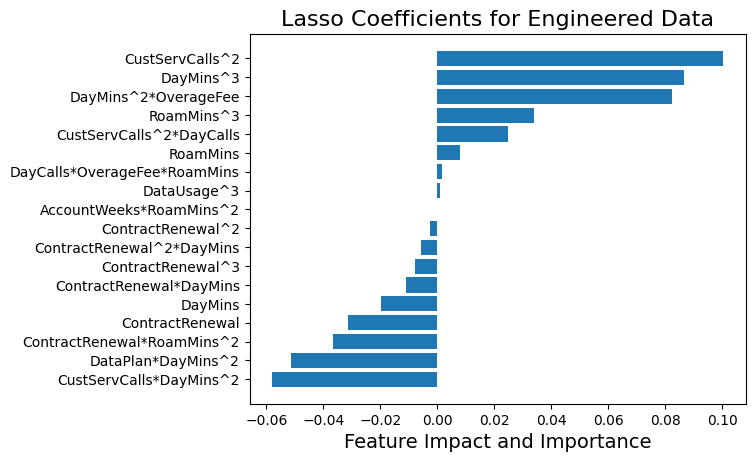

In [23]:
f_importances(sel_.estimator_.coef_[sel_.get_support()], feature_names, "Lasso Coefficients for Engineered Data")

In [25]:
sel_1 = SelectFromModel(Lasso(alpha=0.01))
sel_1.fit(scaler.fit_transform(X), y)

SelectFromModel(estimator=Lasso(alpha=0.01))

In [26]:
features = sel_1.get_feature_names_out()

In [35]:
features_names = np.array(features_names)

In [36]:
features_names[sel_1.get_support()]

array(['ContractRenewal', 'DataPlan', 'CustServCalls', 'DayMins',
       'OverageFee', 'RoamMins'], dtype='<U15')

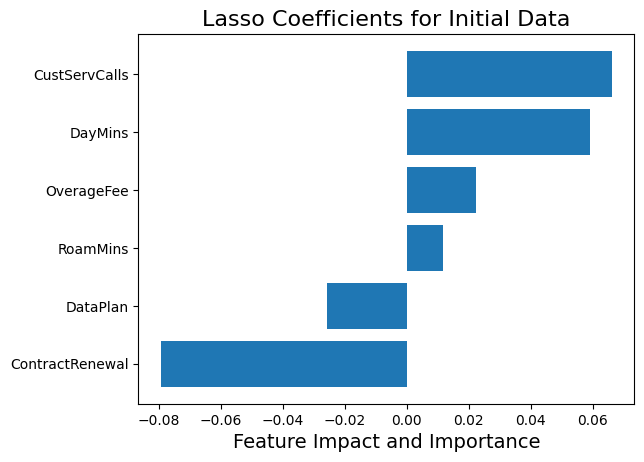

In [37]:
f_importances(sel_1.estimator_.coef_[sel_1.get_support()], features_names[sel_1.get_support()], "Lasso Coefficients for Initial Data")

### Ridge

In [ ]:
sel1 = SelectFromModel(Ridge(alpha=1))
sel1.fit(scaler.fit_transform(x_poly), y)

SelectFromModel(estimator=Ridge(alpha=1))

In [ ]:
x_poly_new1 = sel1.transform(x_poly)

In [ ]:
x_poly_new1.shape

(3333, 98)

In [ ]:
features1 = sel1.get_feature_names_out()

In [ ]:
features1 = [int(feature[1:]) for feature in features1]

In [ ]:
polynomial_features.get_feature_names_out()[features1]

array(['x2', 'x3', 'x4', 'x5', 'x6', 'x0 x1', 'x0 x7', 'x1 x3', 'x2^2',
       'x2 x3', 'x2 x5', 'x2 x7', 'x2 x8', 'x2 x9', 'x3 x4', 'x3 x5',
       'x3 x7', 'x3 x8', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x8', 'x4 x9',
       'x5^2', 'x5 x7', 'x5 x8', 'x5 x9', 'x6 x8', 'x7^2', 'x7 x8',
       'x8^2', 'x0^2 x8', 'x0 x1^2', 'x0 x1 x6', 'x0 x1 x8', 'x0 x2 x3',
       'x0 x2 x4', 'x0 x2 x6', 'x0 x2 x9', 'x0 x3^2', 'x0 x3 x4',
       'x0 x3 x6', 'x0 x4 x9', 'x0 x6^2', 'x1^2 x3', 'x1 x2 x3',
       'x1 x2 x4', 'x1 x2 x6', 'x1 x2 x9', 'x1 x3^2', 'x1 x3 x5',
       'x1 x3 x6', 'x1 x3 x9', 'x1 x4^2', 'x1 x4 x6', 'x1 x4 x8',
       'x1 x5^2', 'x1 x5 x6', 'x1 x5 x9', 'x1 x6^2', 'x1 x6 x8',
       'x1 x8 x9', 'x1 x9^2', 'x2^3', 'x2^2 x3', 'x2^2 x5', 'x2^2 x7',
       'x2^2 x8', 'x2^2 x9', 'x2 x4 x5', 'x2 x5^2', 'x2 x5 x7',
       'x2 x5 x8', 'x2 x6^2', 'x2 x7^2', 'x3^2 x4', 'x3 x4^2', 'x3 x5^2',
       'x3 x5 x6', 'x3 x5 x8', 'x3 x5 x9', 'x3 x6^2', 'x4^3', 'x4^2 x5',
       'x4^2 x6', 'x4^2 x7', 'x4^2 x8'

### ElasticNet

Was not removing any features

## Testing

In [ ]:
acc = []
kf = KFold(n_splits=10,shuffle=True,random_state=1234)

model = RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=65)

for idxtrain, idxtest in kf.split(x_poly_new):
  xtrain = x_poly_new[idxtrain]
  ytrain = y[idxtrain]
  ytest = y[idxtest]
  xtest = x_poly_new[idxtest]
  xtrain = scaler.fit_transform(xtrain)
  xtest = scaler.transform(xtest)

  model.fit(xtrain,ytrain)
  yhat = model.predict(xtest)

  acc.append(100*(1 - (np.sum(np.abs(np.around(yhat)-ytest))/len(yhat))))

print("Average accuracy:" + str(np.mean(acc)) + '%')
for i in acc:
  print(str(i) + '%')

Average accuracy:93.57788926651202%
95.20958083832335%
95.20958083832335%
95.20958083832335%
93.09309309309309%
94.29429429429429%
92.49249249249249%
92.49249249249249%
93.69369369369369%
93.09309309309309%
90.990990990991%


In [ ]:
acc = []
kf = KFold(n_splits=10,shuffle=True,random_state=1234)

model = RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=65)

for idxtrain, idxtest in kf.split(x_poly_new1):
  xtrain = x_poly_new1[idxtrain]
  ytrain = y[idxtrain]
  ytest = y[idxtest]
  xtest = x_poly_new1[idxtest]
  xtrain = scaler.fit_transform(xtrain)
  xtest = scaler.transform(xtest)

  model.fit(xtrain,ytrain)
  yhat = model.predict(xtest)

  acc.append(100*(1 - (np.sum(np.abs(np.around(yhat)-ytest))/len(yhat))))

print("Average accuracy:" + str(np.mean(acc)) + '%')
for i in acc:
  print(str(i) + '%')

Average accuracy:93.42728956501412%
96.10778443113772%
95.50898203592814%
95.50898203592814%
93.3933933933934%
92.7927927927928%
90.990990990991%
93.09309309309309%
93.69369369369369%
93.09309309309309%
90.09009009009009%


In [ ]:
acc = []
kf = KFold(n_splits=10,shuffle=True,random_state=1234)

model = RandomForestRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=65)

for idxtrain, idxtest in kf.split(x_poly):
  xtrain = x_poly[idxtrain]
  ytrain = y[idxtrain]
  ytest = y[idxtest]
  xtest = x_poly[idxtest]
  xtrain = scaler.fit_transform(xtrain)
  xtest = scaler.transform(xtest)

  model.fit(xtrain,ytrain)
  yhat = model.predict(xtest)

  acc.append(100*(1 - (np.sum(np.abs(np.around(yhat)-ytest))/len(yhat))))

print("Average accuracy:" + str(np.mean(acc)) + '%')
for i in acc:
  print(str(i) + '%')

Average accuracy:93.69755983528438%
96.10778443113772%
95.80838323353294%
95.20958083832335%
93.69369369369369%
94.8948948948949%
91.5915915915916%
92.49249249249249%
93.3933933933934%
92.7927927927928%
90.990990990991%


## Feature Importance

In [ ]:
# https://scikit-learn.org/stable/modules/feature_selection.html

In [ ]:
clf = ExtraTreesClassifier(n_estimators=65)
clf = clf.fit(X, y)
clf.feature_importances_        

array([0.07104466, 0.07288372, 0.02259804, 0.05488639, 0.15485662,
       0.17602974, 0.07144147, 0.19624439, 0.08922613, 0.09078884])

In [ ]:
x = np.c_[np.array(data.columns[1:]),clf.feature_importances_]
x

array([['AccountWeeks', 0.07075787593143884],
       ['ContractRenewal', 0.0725679148259318],
       ['DataPlan', 0.019573583253485623],
       ['DataUsage', 0.059389552285724206],
       ['CustServCalls', 0.15705350408123975],
       ['DayMins', 0.17769594857822946],
       ['DayCalls', 0.07069639656597466],
       ['MonthlyCharge', 0.1934370774647075],
       ['OverageFee', 0.08805312014353117],
       ['RoamMins', 0.090775026869737]], dtype=object)

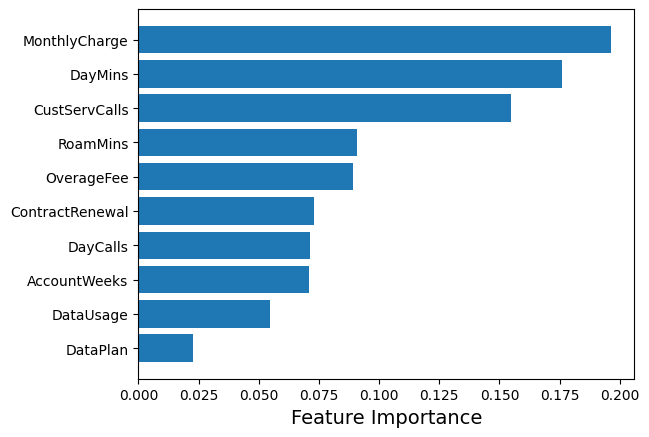

In [ ]:
f_importances(clf.feature_importances_, data.columns[1:])

In [ ]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(3333, 3)

In [ ]:
X_new

array([[  1. , 265.1,  89. ],
       [  1. , 161.6,  82. ],
       [  0. , 243.4,  52. ],
       ...,
       [  2. , 180.8,  56. ],
       [  2. , 213.8,  50. ],
       [  0. , 234.4, 100. ]])

In [ ]:
lsvc = svm.LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)

In [ ]:
X_new = model.transform(X)

(3333, 7)

In [ ]:
svm = svm.SVC(kernel='linear')
svm.fit(X, y)
svm.coef_

array([[-3.23446293e-05, -1.37986523e-01, -5.46746414e-02,
         4.24435272e-03,  2.86457525e-02,  7.33969544e-04,
         5.03182891e-05, -5.81526771e-04,  1.15501578e-02,
         5.91041585e-03]])

In [ ]:
np.c_[np.array(data.columns[1:]),svm.coef_[0]]
ContractRenewal
DataPlan
MonthlyCharge
AccountWeeks

CustServCalls
OverageFee
RoamMins
DataUsage
DayMins
DayCalls

array([['AccountWeeks', -3.234462928958237e-05],
       ['ContractRenewal', -0.13798652267018952],
       ['DataPlan', -0.054674641401973645],
       ['DataUsage', 0.004244352718071109],
       ['CustServCalls', 0.028645752533066116],
       ['DayMins', 0.000733969543944113],
       ['DayCalls', 5.031828914070502e-05],
       ['MonthlyCharge', -0.0005815267705600036],
       ['OverageFee', 0.011550157766109237],
       ['RoamMins', 0.005910415849628592]], dtype=object)

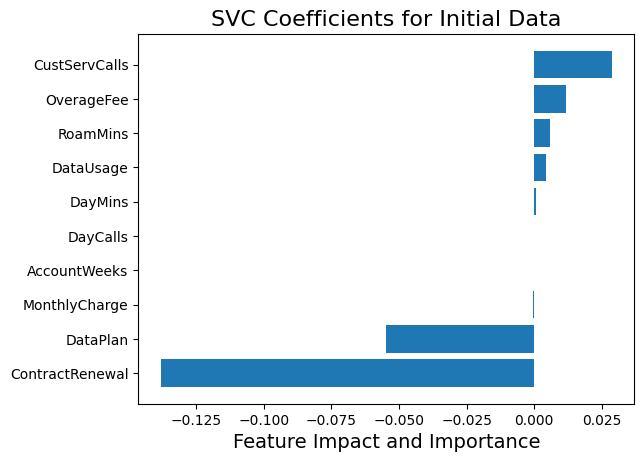

In [ ]:
lsvm = svm.SVC(kernel='linear')
lsvm.fit(X, y)
f_importances(lsvm.coef_[0], features_names, "SVC Coefficients for Initial Data")

In [ ]:
features_names = list(data.columns[1:])
lsvm = svm.SVC(kernel='linear')
lsvm.fit(x_poly_new, y)
f_importances(lsvm.coef_[0], feature_names, "SVC Coefficients for Engineered Data")

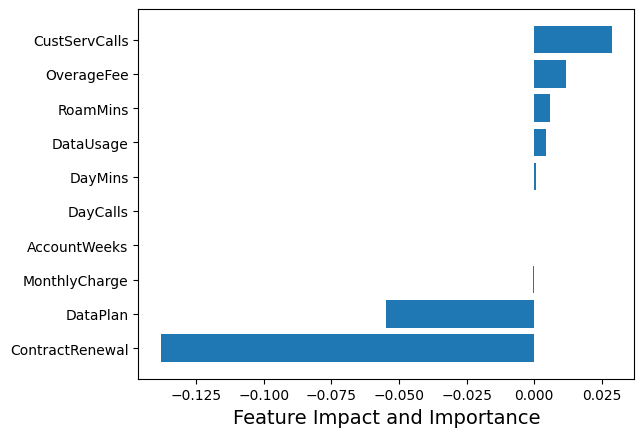

In [ ]:
f_importances(lsvm.coef_[0], features_names)

In [ ]:
imp,names

((array([-3.23446293e-05, -1.37986523e-01, -5.46746414e-02,  4.24435272e-03,
          2.86457525e-02,  7.33969544e-04,  5.03182891e-05, -5.81526771e-04,
          1.15501578e-02,  5.91041585e-03]),),
 ('Churn',))

In [ ]:
def get_natural_cubic_spline_model(x, y, minval=None, maxval=None, n_knots=None, knots=None):
    """
    Get a natural cubic spline model for the data.

    For the knots, give (a) `knots` (as an array) or (b) minval, maxval and n_knots.

    If the knots are not directly specified, the resulting knots are equally
    space within the *interior* of (max, min).  That is, the endpoints are
    *not* included as knots.

    Parameters
    ----------
    x: np.array of float
        The input data
    y: np.array of float
        The outpur data
    minval: float 
        Minimum of interval containing the knots.
    maxval: float 
        Maximum of the interval containing the knots.
    n_knots: positive integer 
        The number of knots to create.
    knots: array or list of floats 
        The knots.

    Returns
    --------
    model: a model object
        The returned model will have following method:
        - predict(x):
            x is a numpy array. This will return the predicted y-values.
    """

    if knots:
        spline = NaturalCubicSpline(knots=knots)
    else:
        spline = NaturalCubicSpline(max=maxval, min=minval, n_knots=n_knots)

    p = Pipeline([
        ('nat_cubic', spline),
        #('regression', LinearRegression(fit_intercept=True))
    ])

    p.fit(x, y)

    return p


class AbstractSpline(BaseEstimator, TransformerMixin):
    """Base class for all spline basis expansions."""

    def __init__(self, max=None, min=None, n_knots=None, n_params=None, knots=None):
        if knots is None:
            if not n_knots:
                n_knots = self._compute_n_knots(n_params)
            knots = np.linspace(min, max, num=(n_knots + 2))[1:-1]
            max, min = np.max(knots), np.min(knots)
        self.knots = np.asarray(knots)

    @property
    def n_knots(self):
        return len(self.knots)

    def fit(self, *args, **kwargs):
        return self


class NaturalCubicSpline(AbstractSpline):
    """Apply a natural cubic basis expansion to an array.
    The features created with this basis expansion can be used to fit a
    piecewise cubic function under the constraint that the fitted curve is
    linear *outside* the range of the knots..  The fitted curve is continuously
    differentiable to the second order at all of the knots.
    This transformer can be created in two ways:
      - By specifying the maximum, minimum, and number of knots.
      - By specifying the cutpoints directly.  

    If the knots are not directly specified, the resulting knots are equally
    space within the *interior* of (max, min).  That is, the endpoints are
    *not* included as knots.
    Parameters
    ----------
    min: float 
        Minimum of interval containing the knots.
    max: float 
        Maximum of the interval containing the knots.
    n_knots: positive integer 
        The number of knots to create.
    knots: array or list of floats 
        The knots.
    """

    def _compute_n_knots(self, n_params):
        return n_params

    @property
    def n_params(self):
        return self.n_knots - 1

    def transform(self, X, **transform_params):
        X_spl = self._transform_array(X)
        if isinstance(X, pd.Series):
            col_names = self._make_names(X)
            X_spl = pd.DataFrame(X_spl, columns=col_names, index=X.index)
        return X_spl

    def _make_names(self, X):
        first_name = "{}_spline_linear".format(X.name)
        rest_names = ["{}_spline_{}".format(X.name, idx)
                      for idx in range(self.n_knots - 2)]
        return [first_name] + rest_names

    def _transform_array(self, X, **transform_params):
        X = X.squeeze()
        try:
            X_spl = np.zeros((X.shape[0], self.n_knots - 1))
        except IndexError: # For arrays with only one element
            X_spl = np.zeros((1, self.n_knots - 1))
        X_spl[:, 0] = X.squeeze()

        def d(knot_idx, x):
            def ppart(t): return np.maximum(0, t)

            def cube(t): return t*t*t
            numerator = (cube(ppart(x - self.knots[knot_idx]))
                         - cube(ppart(x - self.knots[self.n_knots - 1])))
            denominator = self.knots[self.n_knots - 1] - self.knots[knot_idx]
            return numerator / denominator

        for i in range(0, self.n_knots - 2):
            X_spl[:, i+1] = (d(i, X) - d(self.n_knots - 2, X)).squeeze()
        return X_spl

In [ ]:
class GAM1:
    def __init__(self, n_knots=40):
        self.n_knots = 40
    
    def fit(self, x, y):
        self.xtrain_ = x
        self.yhat_ = y

    def predict(self, x_new, y_new):
        check_is_fitted(self)
        x = self.xtrain_
        y = self.yhat_
        n_knots = self.n_knots
        residuals = []
        for i in range(x.shape[1]):
          model = get_natural_cubic_spline_model(x[:,i], y, minval=np.min(x[:,i]), maxval=np.max(x[:,i]), n_knots=n_knots)
          yhat_test = model.predict(x_new[:,i])
          residuals.append(y_new-yhat_test)
        #return np.sum(residuals, axis=0)
        return np.mean(residuals, axis=0)

    def get_params(self, deep=True):
        return {"n_knots": self.n_knots}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [ ]:
class GAM2:
    def __init__(self, n_knots=40):
        self.n_knots = 40
    
    def fit(self, x, y):
        self.xtrain_ = x
        self.yhat_ = y

    def predict(self, x_new, y_new):
        check_is_fitted(self)
        x = self.xtrain_
        y = self.yhat_
        n_knots = self.n_knots
        residuals = []
        for i in range(x.shape[1]):
          model = get_natural_cubic_spline_model(x[:,i], y, minval=np.min(x[:,i]), maxval=np.max(x[:,i]), n_knots=n_knots)
          yhat_test = model.predict(x_new[:,i])
          residuals.append(y_new-yhat_test)
        #return np.sum(residuals, axis=0)
        return np.mean(residuals, axis=0)

    def get_params(self, deep=True):
        return {"n_knots": self.n_knots}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [ ]:
def boosted(x, y, xnew, model1, model2, gam_first = False, gam_second = False, ynew = None):
  model1.fit(x,y)
  if gam_first:
    residuals1 = y - model1.predict(x,y)
  else:
    residuals1 = y - model1.predict(x)
  model2.fit(x,np.around(residuals1))
  if gam_first and gam_second:
    output = model1.predict(xnew,ynew) + model2.predict(xnew, ynew)
  elif gam_second:
    output = model1.predict(xnew) + model2.predict(xnew, ynew)
  elif gam_first:
    output = model1.predict(xnew, ynew) + model2.predict(xnew)
  else:
    output = model1.predict(xnew) + model2.predict(xnew)
  return output 

In [42]:
forest1 = RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=95)
#gam1 = GAM1(40)

In [41]:
mses = []
acc = []
kf = KFold(n_splits=10,shuffle=True,random_state=1234)

for idxtrain, idxtest in kf.split(x_poly_new):
  xtrain = x_poly_new[idxtrain]
  ytrain = y[idxtrain]
  ytest = y[idxtest]
  xtest = x_poly_new[idxtest]
  xtrain = scaler.fit_transform(xtrain)
  xtest = scaler.transform(xtest)
  
  boost = np.around(boosted(xtrain, ytrain, xtest, gam1, forest1, True, False, ytest))

  mses.append(mse(ytest,boost))
  acc.append(accuracy_score(ytest, np.around(boost)))

print("The new Cross-validated Mean Squared Error for Gramfort's Locally Weighted Regression is : "+str(np.mean(mses)))
print("Average accuracy:" + str(np.mean(acc)) + '%')
for i in acc:
  print(str(i) + '%')

NameError: ignored

In [43]:
forest1 = forest1.fit(X, y)
fir = forest1.feature_importances_   
fir

array([0.0209947 , 0.10707702, 0.0489204 , 0.08781684, 0.15694444,
       0.21340435, 0.02412674, 0.205069  , 0.07087074, 0.06477578])

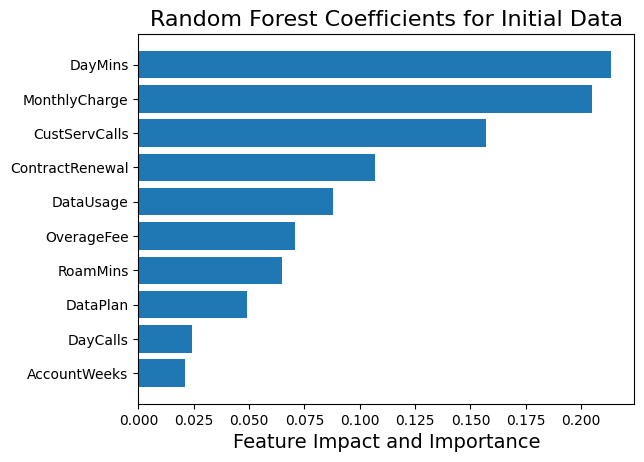

In [44]:
f_importances(fir, data.columns[1:], "Random Forest Coefficients for Initial Data")

In [45]:
forest1 = forest1.fit(x_poly_new, y)
fie = forest1.feature_importances_ 
fie

array([0.02573001, 0.0617831 , 0.03762397, 0.02128854, 0.07462524,
       0.08621853, 0.0219651 , 0.0156171 , 0.05082095, 0.01619804,
       0.0432177 , 0.05775387, 0.09083301, 0.02247736, 0.07052659,
       0.23028415, 0.03227107, 0.04076567])

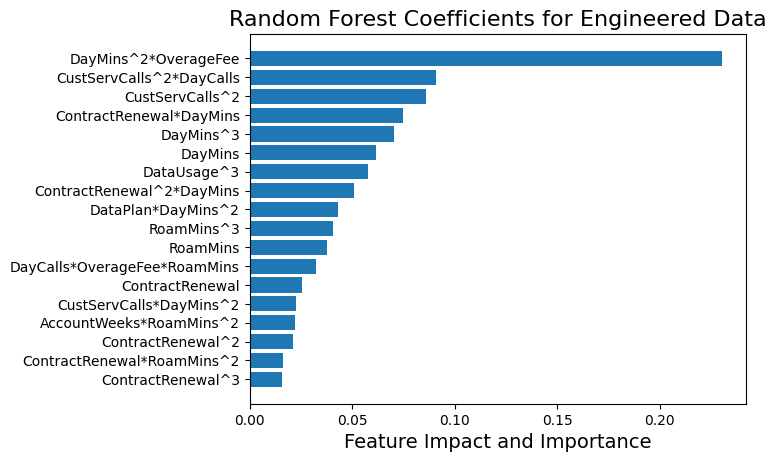

In [46]:
f_importances(fie, feature_names, "Random Forest Coefficients for Engineered Data")

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.unique(y,return_counts=True)

(array([0, 1]), array([2850,  483]))

In [ ]:
2411/3333

0.7233723372337234